### Student Information
Name: 李宇昂

Student ID: R12946015

GitHub ID: SpeeeedLee (https://github.com/SpeeeedLee/SN_lab3_homework)

Kaggle name: Speeeed15

Kaggle private scoreboard snapshot: [Snapshot](./img/pic0.png)

### Prediction Procss Step by Step

#### 0. Data Cleaning

##### 0-1. Load all the data

In [2]:
import pandas as pd
import json

file_name = './datasets/tweets_DM.json'
tweets_data = []

with open(file_name, 'r', encoding='utf-8') as file:
    for line in file:
        tweet = json.loads(line)
        tweet_id = tweet['_source']['tweet']['tweet_id']
        score = tweet['_score']
        hashtags = tweet['_source']['tweet']['hashtags']
        text = tweet['_source']['tweet']['text']
        crawl_date = tweet['_crawldate']
        tweets_data.append({'tweet_id': tweet_id, '_score': score, 'hashtags': hashtags, 'crawl_date' : crawl_date, 'text': text})

tweets_df = pd.DataFrame(tweets_data)

tweets_df.to_csv('./datasets/data_preprocess.csv', index=False)
tweets_df.head()

,tweet_id,_score,hashtags,crawl_date,text
0,0x376b20,391,[Snapchat],2015-05-23 11:42:47,"People who post ""add me on #Snapchat"" must be ..."
1,0x2d5350,433,"[freepress, TrumpLegacy, CNN]",2016-01-28 04:52:09,"@brianklaas As we see, Trump is dangerous to #..."
2,0x28b412,232,[bibleverse],2017-12-25 04:39:20,"Confident of your obedience, I write to you, k..."
3,0x1cd5b0,376,[],2016-01-24 23:53:05,Now ISSA is stalking Tasha 😂😂😂 <LH>
4,0x2de201,989,[],2016-01-08 17:18:59,"""Trust is not the same as faith. A friend is s..."


In [3]:
emotion_df = pd.read_csv('./datasets/emotion.csv')
emotion_df.head()

,tweet_id,emotion
0,0x3140b1,sadness
1,0x368b73,disgust
2,0x296183,anticipation
3,0x2bd6e1,joy
4,0x2ee1dd,anticipation


In [4]:
identification_df = pd.read_csv('./datasets/data_identification.csv')
identification_df.head()

,tweet_id,identification
0,0x28cc61,test
1,0x29e452,train
2,0x2b3819,train
3,0x2db41f,test
4,0x2a2acc,train


##### 0-2 Merge the data_preprocess.csv, emotion,csv, data_identification.csv to form a final DataFrame

In [6]:
merged_df = pd.merge(tweets_df, identification_df, on='tweet_id', how='outer')
merged_df.head()

,tweet_id,_score,hashtags,crawl_date,text,identification
0,0x376b20,391,[Snapchat],2015-05-23 11:42:47,"People who post ""add me on #Snapchat"" must be ...",train
1,0x2d5350,433,"[freepress, TrumpLegacy, CNN]",2016-01-28 04:52:09,"@brianklaas As we see, Trump is dangerous to #...",train
2,0x28b412,232,[bibleverse],2017-12-25 04:39:20,"Confident of your obedience, I write to you, k...",test
3,0x1cd5b0,376,[],2016-01-24 23:53:05,Now ISSA is stalking Tasha 😂😂😂 <LH>,train
4,0x2de201,989,[],2016-01-08 17:18:59,"""Trust is not the same as faith. A friend is s...",test


In [8]:
# Create Cleaned Training Dataset
train_df = merged_df[merged_df['identification'] == 'train']
train_df = pd.merge(train_df, emotion_df, on='tweet_id', how='outer')
train_df.to_csv('./datasets/train_data_clean.csv', index=False)
train_df.head()

,tweet_id,_score,hashtags,crawl_date,text,identification,emotion
0,0x376b20,391,[Snapchat],2015-05-23 11:42:47,"People who post ""add me on #Snapchat"" must be ...",train,anticipation
1,0x2d5350,433,"[freepress, TrumpLegacy, CNN]",2016-01-28 04:52:09,"@brianklaas As we see, Trump is dangerous to #...",train,sadness
2,0x1cd5b0,376,[],2016-01-24 23:53:05,Now ISSA is stalking Tasha 😂😂😂 <LH>,train,fear
3,0x1d755c,120,"[authentic, LaughOutLoud]",2015-06-11 04:44:05,@RISKshow @TheKevinAllison Thx for the BEST TI...,train,joy
4,0x2c91a8,1021,[],2015-08-18 02:30:07,Still waiting on those supplies Liscus. <LH>,train,anticipation


In [9]:
# Create Cleaned Testing Dataset
test_df = merged_df[merged_df['identification'] == 'test']
test_df.to_csv('./datasets/test_data_clean.csv', index=False)
test_df.head()

,tweet_id,_score,hashtags,crawl_date,text,identification
2,0x28b412,232,[bibleverse],2017-12-25 04:39:20,"Confident of your obedience, I write to you, k...",test
4,0x2de201,989,[],2016-01-08 17:18:59,"""Trust is not the same as faith. A friend is s...",test
9,0x218443,66,"[materialism, money, possessions]",2015-09-09 09:22:55,When do you have enough ? When are you satisfi...,test
30,0x2939d5,104,"[GodsPlan, GodsWork]",2015-10-10 14:33:26,"God woke you up, now chase the day #GodsPlan #...",test
33,0x26289a,310,[],2016-10-23 08:49:50,"In these tough times, who do YOU turn to as yo...",test


1. Load and Split the Data

In [1]:
import pandas as pd
train_df = pd.read_csv('./datasets/train_data_clean.csv')
test_df = pd.read_csv('./datasets/test_data_clean.csv')

FileNotFoundError: [Errno 2] No such file or directory: '../datasets/train_data_clean.csv'

### 1. Data Exploration

##### 1-1. Label Distribution

In [10]:
train_df.groupby(['emotion']).count()['text']

emotion
anger            39867
anticipation    248935
disgust         139101
fear             63999
joy             516017
sadness         193437
surprise         48729
trust           205478
Name: text, dtype: int64

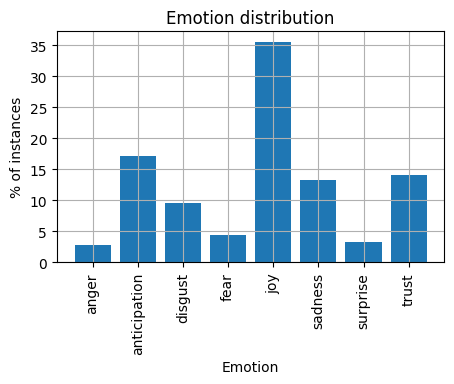

In [11]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

# the histogram of the data
labels = train_df['emotion'].unique()
post_total = len(train_df)
df1 = train_df.groupby(['emotion']).count()['text']
df1 = df1.apply(lambda x: round(x*100/post_total,3))

#plot
fig, ax = plt.subplots(figsize=(5,3))
plt.bar(df1.index,df1.values)

#arrange
plt.xticks(rotation=90)
plt.ylabel('% of instances')
plt.xlabel('Emotion')
plt.title('Emotion distribution')
plt.grid(True)
plt.show()

We can find out that "Joy" is much more than other label, maybe we can form a more balance datasets in the training step later to alleiviate this issue !

##### 1-2. Word Distribution

Top 50 training set word frequency:
['lh' 'the' 'to' 'you' 'and' 'for' 'is' 'in' 'of' 'my' 'it' 'on' 'that'
 'your' 'me' 'be' 'are' 'this' 'with' 'so' 'have' 'all' 'at' 'love' 'not'
 'we' 'just' 'can' 'life' 'but' 'what' 'today' 'when' 'up' 'day' 'god'
 'will' 'was' 'like' 'do' 'he' 'if' 'from' 'no' 'one' 'get' 'out' 'they'
 'by' 'good']


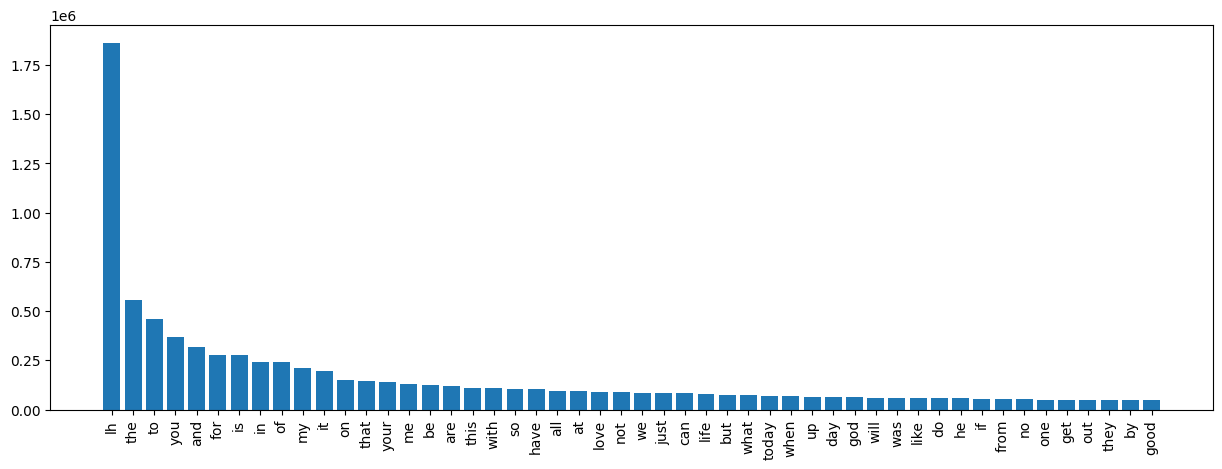

In [13]:
from sklearn.feature_extraction.text import CountVectorizer

train_count_vect_top30 = CountVectorizer(max_features=50) 

train_text = train_count_vect_top30.fit_transform(train_df["text"])

train_word_frequency = [sum(i) for i in train_text.toarray().T]
train_word_index = sorted(range(len(train_word_frequency)),reverse=True, 
                          key=lambda k: train_word_frequency[k])
train_word_rank = np.array(train_count_vect_top30.get_feature_names_out())[train_word_index]

plt.figure(figsize=(15,5))
plt.bar(train_word_rank,sorted(train_word_frequency,reverse=True))
plt.xticks(rotation=90)
print("Top 50 training set word frequency:")
print(train_word_rank)

From here, we can find out that some words is useless and appear frequently in the data (ex: lh...)
Maybe we can remove them before actually feeding the text into our model

##### 1-3. Text Distribution (Word + Puctuation Marks + Emoji)

Using the above method, we cannot see detail property of the training text (A lot of common work like "life", "god", "day"...wchich will apper in all kinds of text)  
  
  
So, let's try to remove stopwords, username, and see the distribution results again 

In [15]:
# Download English Stopwords
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english')) 

# Use default English Stopwords and add self defined stopwords
custom_stop_words = ["LH","lh","<",">","(",")", ";",'#', '.','..','...','....','.....','’','``',"''","'",'‘',',',"'s",'’','-','“']  # 自己家的停用詞列表
merged_stop_words = stop_words.union(custom_stop_words)
print(merged_stop_words)

{'she', 'did', 'why', 'at', 'as', 'don', '>', 'shouldn', 'wouldn', '’', 'these', 'all', 'yourself', 'myself', 'be', 'any', 'wasn', 'have', 'during', 'having', 'won', 'is', 'how', 'haven', 'for', '<', 'no', '#', "you'd", 'by', 'd', "''", 'does', 'that', '(', "wouldn't", 'mightn', 'on', 'some', 'and', 'before', 'shan', 'such', "should've", "you'll", "mightn't", '.....', 'my', 'who', 'what', 'from', 'being', 'been', 'both', '..', 'o', ',', 'same', 'do', 'through', 'there', "mustn't", '‘', 'can', "it's", 'nor', "haven't", "couldn't", 'now', 'they', 'more', 's', 'of', 'ma', 'where', 'because', 'with', 'most', 'itself', "hadn't", 'into', 'the', 'ourselves', 'off', 'few', "didn't", 'aren', 'only', 'ours', 'lh', 'hadn', 'me', 'a', 'below', "doesn't", 'am', 'should', 'after', 'our', 'those', 'just', 'out', 'which', 'not', 'further', 'yours', '“', 'has', 'if', 'here', 'then', 'he', 'didn', 're', '.', 'him', 'herself', 'weren', 'y', 'until', 'an', 'his', 'couldn', 'm', "needn't", "'s", 'its', 'th

In [16]:
import nltk
nltk.download('punkt')

def custom_tokenizer(text):
    words = nltk.word_tokenize(text)  # 使用 NLTK 的 tokenizer
    filtered_words = [word for word in words if not word.startswith("@")]
    return filtered_words

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\arthu\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


C:\Users\arthu\AppData\Roaming\Python\Python39\site-packages\sklearn\feature_extraction\text.py:525: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
C:\Users\arthu\AppData\Roaming\Python\Python39\site-packages\sklearn\feature_extraction\text.py:408: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ["'d", "'ll", "'re", "'ve", 'could', 'might', 'must', "n't", 'need', 'sha', 'wo', 'would'] not in stop_words.
  warnings.warn(


Top 100 training set word frequency:
['!' '?' "n't" '&' 'love' 'life' 'today' ':' 'day' 'god' 'like' "'m" 'get'
 'one' 'good' 'people' 'time' 'got' 'know' 'never' 'thank' 'make' 'see'
 'u' '2017' 'pips' 'new' 'us' 'go' 'happy' 'great' 'realdonaldtrump'
 'much' 'back' 'work' "'re" 'ca' 'still' 'need' 'thanks' 'going' 'always'
 'want' 'would' 'come' 'really' '2' 'best' 'let' 'way' 'even' 'world'
 'right' 'please' 'give' 'last' 'first' 'think' "'ve" 'hope' 'another'
 'say' 'things' 'feel' 'man' 'lots' 'total' 'week' 'ever' 'every' 'closed'
 'night' 'morning' 'follow' 'someone' 'better' 'blessed' 'eurusd'
 'amazing' 'take' 'could' 'well' 'keep' 'feeling' 'tonight' 'year' '1'
 'everyone' 'sad' 'days' 'made' 'help' 'believe' 'play' 'everything'
 'many' 'na' 'show' 'moments' 'jesus']


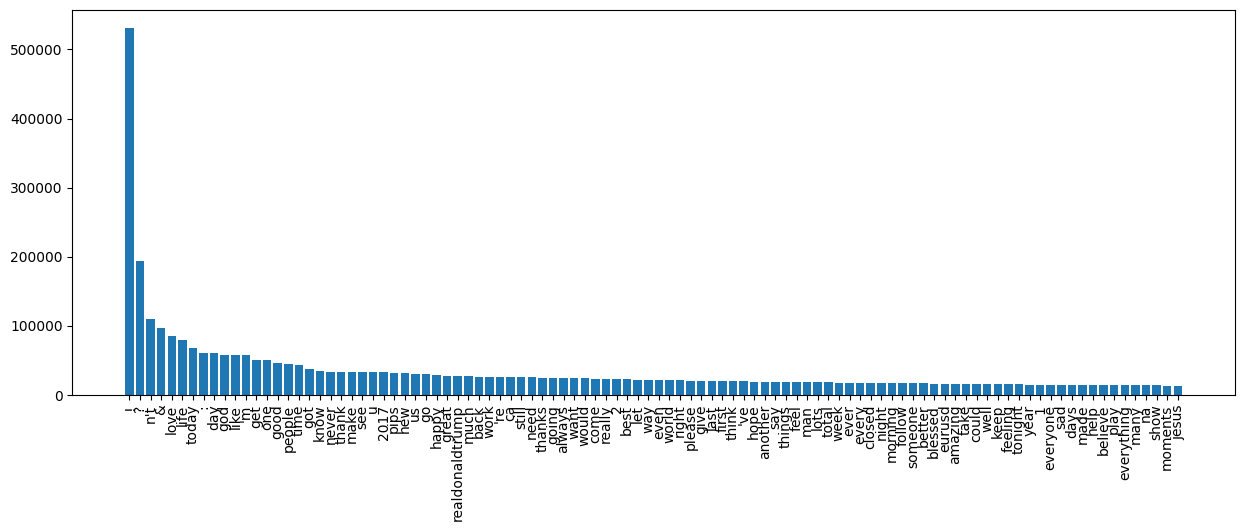

In [17]:
BOW_300 = CountVectorizer(max_features=300, tokenizer=custom_tokenizer, stop_words = list(merged_stop_words))

# apply analyzer to training data
BOW_300.fit(train_df['text'])

train_data_BOW_features_300 = BOW_300.transform(train_df['text'])
train_word_frequency = [sum(i) for i in train_data_BOW_features_300.toarray().T]
train_word_index = sorted(range(len(train_word_frequency)),reverse=True, 
                          key=lambda k: train_word_frequency[k])
train_word_rank = np.array(BOW_300.get_feature_names_out())[train_word_index][0:100]
train_word_frequency_desired = sorted(train_word_frequency, reverse=True)[0:100]

plt.figure(figsize=(15,5))
plt.bar(train_word_rank,train_word_frequency_desired)
plt.xticks(rotation=90)
print("Top 100 training set word frequency:")
print(train_word_rank)

After removing stop words, we can see that these text contain lots of "tweet-like" words, phrases and empoji,  
EX: "realdonaldtrump", "follow", "2017", "pips"...
  
This remind me that we are deailing with a dataset crawled from "Twitter", it might be important in regards of picking moedl for training later

### 2. Methods that don'k work well 

##### Tree-based model  

+ Step 1. Merge train_df and test_df --> Merge_df  
+ Step 2. Use Merge_df to do the following:  
    + A. Get Bag_of_words(max_feature = 100,000, customized_stop_words) to create 100,000 dimension embedding for each text  
	+ B. Transform the Bag_of_word matrix to TF-IDF matrix, so that every word will now have TF-IDF embedding with same dimension  
	+ C. Pick the top 30,000 words out in the TF-IDF matrix (using the column sum), so that every word will now have 30,000 dimension embedding  
	+ D. Use PCA to further decrease the 30,000-dim to 80-dim
+ Step 3. Use Decision Tree or Random Forest to train  
  
The overall result is available here : [Tree Based Model Result](./img/tree_based_model_result.jpg)


### 3. Final Method  

##### Pretrained Large Language Model

+ As one can see, the prediction were not good enogh when using tree-based model  
  
+ It comes to my mind that if each text is an vector in the embedding space,  
    (Since we use Bag of words, TF-ITF, PCA in sequnce, so the resulting 80 features should be regard as vector, i.e. thet are related)  
  
+ Then, instead of using tree-based model that view each feature seperately in each layer, why not use deep learning model that can handle all features together in each layer? 

+ Well, when it comes to NN model, we certainly need to use pretrained model !  
    (Design a model structure and train it from scratch would be crazy, and frankly speacking, I'm not that good at coding all those code)

+ Thanks to previous data exploration step, I notice the following:
    + These text has strong twitter-style
    + These text might come from around 2017 (Since the word "Trump", "2017" frequently apper in the tweets)   
+ So the pretained model I found is "twitter-roberta-base-2022-154m". which have been pretrained on 154M tweets until 2022
    https://huggingface.co/cardiffnlp/twitter-roberta-base-2022-154m
    

##### The final version source code of finetunig the model is at ./code/finetune_roberta.py

### 4. Experiments and Results

+ The learning rate scheduler I used is "get_cosine_schedule_with_warmup", which I think is suitable for finetuning a LLM !  
+ The cosine warm up scheduler work as follows:  
    [consine_warmup_scheduler](./img/cosine_warmup_scheduler.png)

+ All experiments and their hyperparameters settings are over here !  
     [Experiment settings and Results](./img/finetune_exp.jpg)

I start with only one layer of the classifier head  
+ With this design, the model directly convert the 768-dim embbeding of a tweeet to 8-dimension logits
+ However, it turns out that the result isn't good (Performance of first few epochs is better than later epoch)  
    + This probably means that the model is too simple, keep feeding the data to it is useless

+ Also, I try to use balance training datasets in each epoch  
    + Sample 65% of "Joy", 90% of "other labels"  
    + The result is not better than previus one

Then, I try to use a more complex head

+ Head Architecture  
    + Dropout(0.3)  
    + Hidden Layer (768 dimension)
    + Dropout(0.3)  
    + Classifier  
+ The result is much more better now  
    [Training Loss vs. Batch](./img/train_loss_partial.jpg)  
    [Validation Loss vs. Batch](./img/validation_loss_partial.jpg)  
    To convert Batch to Epoch --> ([Epoch vs. Batch](./img/Epoch_2_batch_partial.jpg))

Finally, I want to use all training datasets to train the model  
(Only 85% training data was used previous)

+ Hyperparameter Choosing  
     + From the results in the previous step, we can see that the validation loss is still healthly decreasing  
     + Hence, I should keep all the hyperparameters unchanged, and train with more epochs  
     + However, time is running, I don't have so many time  
     + So at the end, I used :  
         Higher learning_rate  
         Higher warm_up  
         Larger batch size
  
  (See "experiment setting and results" for detail)

+ Fortunately, the training loss decrease more quicker and the Public / Private score is good !  
    [Final Training Loss vs. Batch](./img/train_loss_all.jpg)  
        To convert Batch to Epoch --> ([Epoch vs. Batch](./img/Epoch_2_batch_all.jpg))